In [2]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
print('numpy version : ', np.__version__)
print('pandas version : ', pd.__version__)
print('seaborn version : ', sns.__version__)

numpy version :  1.20.1
pandas version :  1.2.2
seaborn version :  0.11.0


In [7]:
from mpl_toolkits.mplot3d import Axes3D

In [8]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style('whitegrid')
sns.color_palette('dark')
plt.style.use('fivethirtyeight')

# Clustering

### Clustering with 2 Features

In [14]:
data = pd.read_csv('marketplace_customers.csv')
#data.head()

In [15]:
data = data.dropna()
data.head()

,CustomerID,Age,Annual Spending (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [16]:
data = data[['Age','Annual Spending (k$)']]
data.head()

,Age,Annual Spending (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


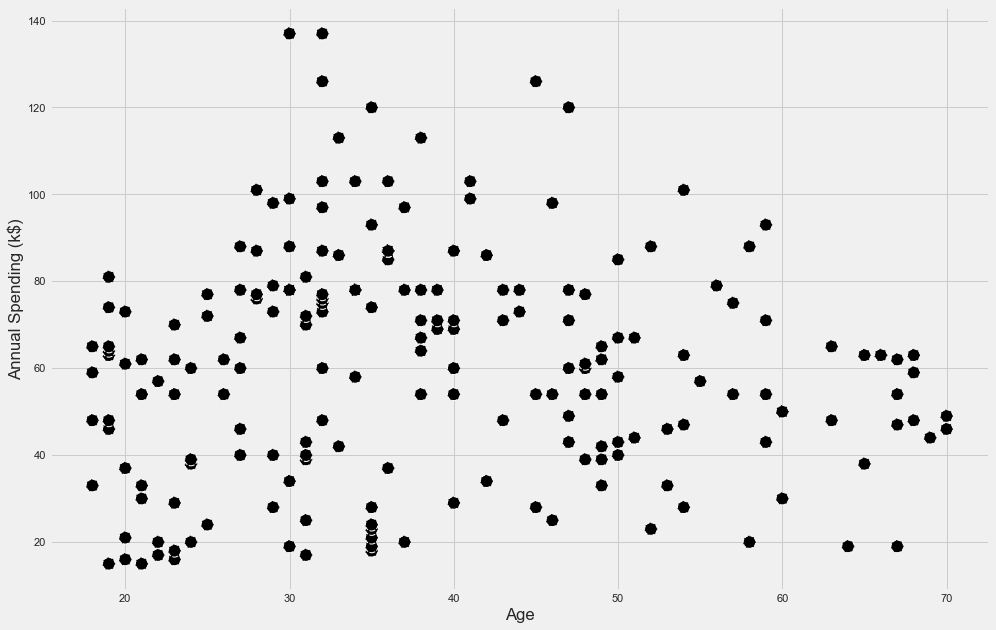

In [20]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='Age', y='Annual Spending (k$)',
    color='black',
    linestyle='--',
    data=data,
    palette=['#00000'],
    s=160,
    ax=ax)

plt.show()

In [22]:
sc_data = StandardScaler()
data_std = sc_data.fit_transform(data.astype(float))

In [23]:
kmeans = KMeans(n_clusters=3, random_state=14).fit(data_std)

In [24]:
clusters = kmeans.labels_

In [25]:
data['clusters'] = clusters

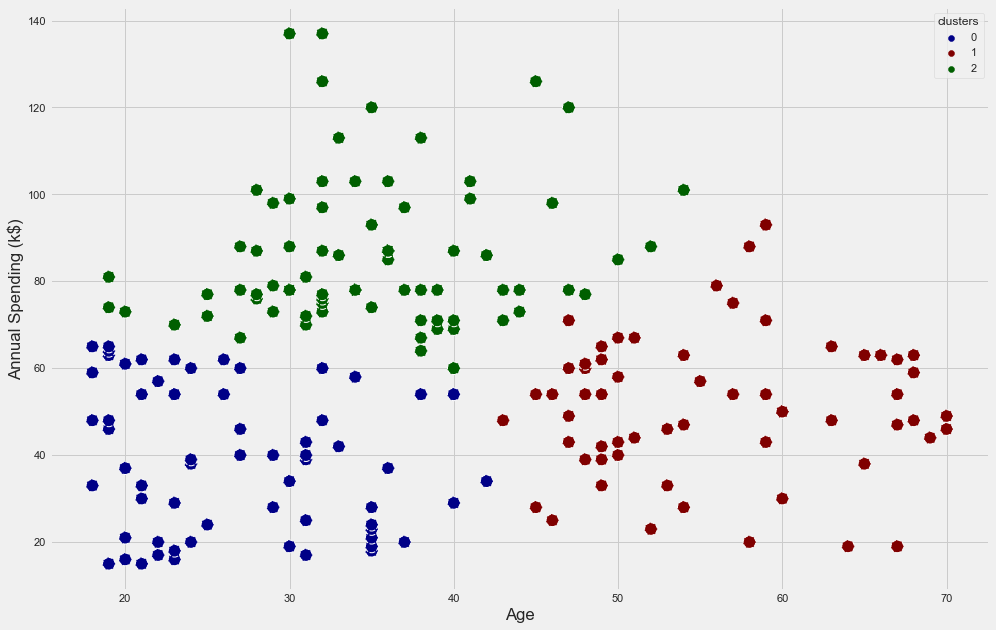

In [30]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='Age', y='Annual Spending (k$)',
    hue='clusters',
    color='green',
    linestyle='--',
    data=data,
    palette=['#000087','#800000','#005f00'],
    s=160,
    ax=ax)

plt.show()

In [31]:
display(data.groupby('clusters').mean())

,Age,Annual Spending (k$)
clusters,,
0,26.661290,38.790323
1,55.806452,51.225806
2,34.960526,85.934211


### Clustering with 3 Features

In [32]:
data = pd.read_csv('marketplace_customers.csv')
data = data.dropna()
data.head()

,CustomerID,Age,Annual Spending (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [33]:
data = data[['Age','Annual Spending (k$)', 'Spending Score (1-100)']]
data.head()

,Age,Annual Spending (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [34]:
sc_data = StandardScaler()
data_std = sc_data.fit_transform(data.astype(float))

In [35]:
kmeans = KMeans(n_clusters=3, random_state=14).fit(data_std)

In [36]:
clusters = kmeans.labels_

In [37]:
data['clusters'] = clusters

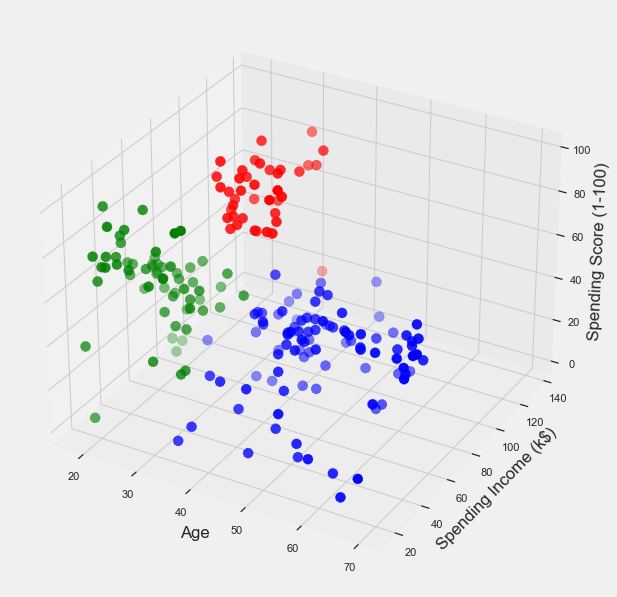

In [38]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.clusters == 0], data["Annual Spending (k$)"][data.clusters == 0], data["Spending Score (1-100)"][data.clusters == 0], c='blue', s=100,linestyle='--')
ax.scatter(data.Age[data.clusters == 1], data["Annual Spending (k$)"][data.clusters == 1], data["Spending Score (1-100)"][data.clusters == 1], c='red', s=100,linestyle='--')
ax.scatter(data.Age[data.clusters == 2], data["Annual Spending (k$)"][data.clusters == 2], data["Spending Score (1-100)"][data.clusters == 2], c='green', s=100,linestyle='--')

plt.xlabel("Age")
plt.ylabel("Spending Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

plt.show()

In [39]:
display(data.groupby('clusters').mean())

,Age,Annual Spending (k$),Spending Score (1-100)
clusters,,,
0,50.298969,60.556701,33.597938
1,32.675000,87.800000,80.525000
2,25.142857,43.269841,56.507937


### Clustering with >3 Features using PCA

In [40]:
data = pd.read_csv('marketplace_customers.csv')
data = data.dropna()
data['Transaction'] = data['Annual Spending (k$)'] * data['Spending Score (1-100)']
data.head()

,CustomerID,Age,Annual Spending (k$),Spending Score (1-100),Transaction
0,1,19,15,39,585
1,2,21,15,81,1215
2,3,20,16,6,96
3,4,23,16,77,1232
4,5,31,17,40,680


In [43]:
data = data[['Age','Annual Spending (k$)','Spending Score (1-100)', 'Transaction']]
data.head()

,Age,Annual Spending (k$),Spending Score (1-100),Transaction
0,19,15,39,585
1,21,15,81,1215
2,20,16,6,96
3,23,16,77,1232
4,31,17,40,680


In [44]:
sc_data = StandardScaler()
data_std = sc_data.fit_transform(data.astype(float))

#### 3 to 2 features

In [45]:
pca = PCA(n_components=2)

pca.fit(data_std)
pcs = pca.transform(data_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca.head()

,PC 1,PC 2
0,-1.185732,2.080852
1,-0.123255,2.552804
2,-2.060763,1.576050
3,-0.235643,2.384080
4,-1.370530,1.536436


#### 2 features

In [47]:
kmeans =KMeans(n_clusters=3, random_state=14).fit(data_pca)

In [48]:
clusters = kmeans.labels_

In [49]:
data['clusters'] = clusters

In [50]:
data_pca['clusters'] = clusters
data_pca.head(2)

,PC 1,PC 2,clusters
0,-1.185732,2.080852,2
1,-0.123255,2.552804,2


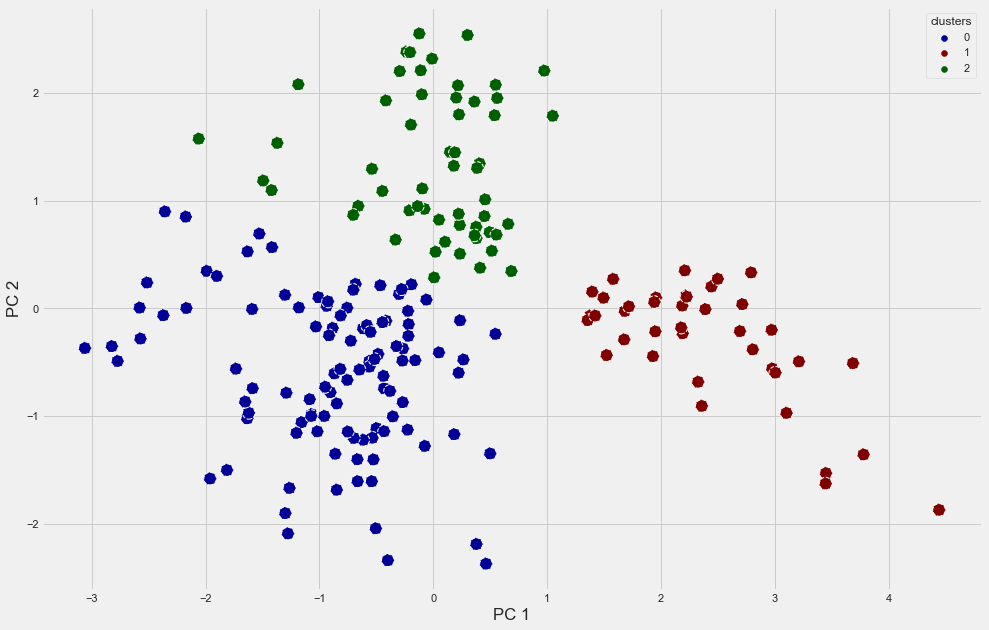

In [56]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    linestyle='--',
    data=data_pca,
    palette=['#000099','#800000','#005f00'],
    s=160,
    ax=ax)

plt.show()

In [58]:
display(data.groupby('clusters').mean())

,Age,Annual Spending (k$),Spending Score (1-100),Transaction
clusters,,,,
0,48.352381,62.066667,32.780952,1948.009524
1,32.692308,86.538462,82.128205,7101.410256
2,25.321429,39.642857,60.625000,2283.267857


### Clustering with >3 Features without PCA

In [59]:
data = pd.read_csv('marketplace_customers.csv')
data = data.dropna()
data['Transaction'] = data['Annual Spending (k$)'] * data['Spending Score (1-100)']
data.head()

,CustomerID,Age,Annual Spending (k$),Spending Score (1-100),Transaction
0,1,19,15,39,585
1,2,21,15,81,1215
2,3,20,16,6,96
3,4,23,16,77,1232
4,5,31,17,40,680


In [60]:
data = data[['Age','Annual Spending (k$)','Spending Score (1-100)','Transaction']]
data.head()

,Age,Annual Spending (k$),Spending Score (1-100),Transaction
0,19,15,39,585
1,21,15,81,1215
2,20,16,6,96
3,23,16,77,1232
4,31,17,40,680


In [61]:
sc_data = StandardScaler()
data_std = sc_data.fit_transform(data.astype(float))

In [62]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(data_std)

In [63]:
clusters = kmeans.labels_

In [64]:
data['clusters'] = clusters

In [65]:
pca = PCA(n_components=2)

pca.fit(data_std)
pcs = pca.transform(data_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca.head()

,PC 1,PC 2
0,-1.185732,2.080852
1,-0.123255,2.552804
2,-2.060763,1.576050
3,-0.235643,2.384080
4,-1.370530,1.536436


In [66]:
data_pca['clusters'] = clusters
data_pca.head(2)

,PC 1,PC 2,clusters
0,-1.185732,2.080852,0
1,-0.123255,2.552804,0


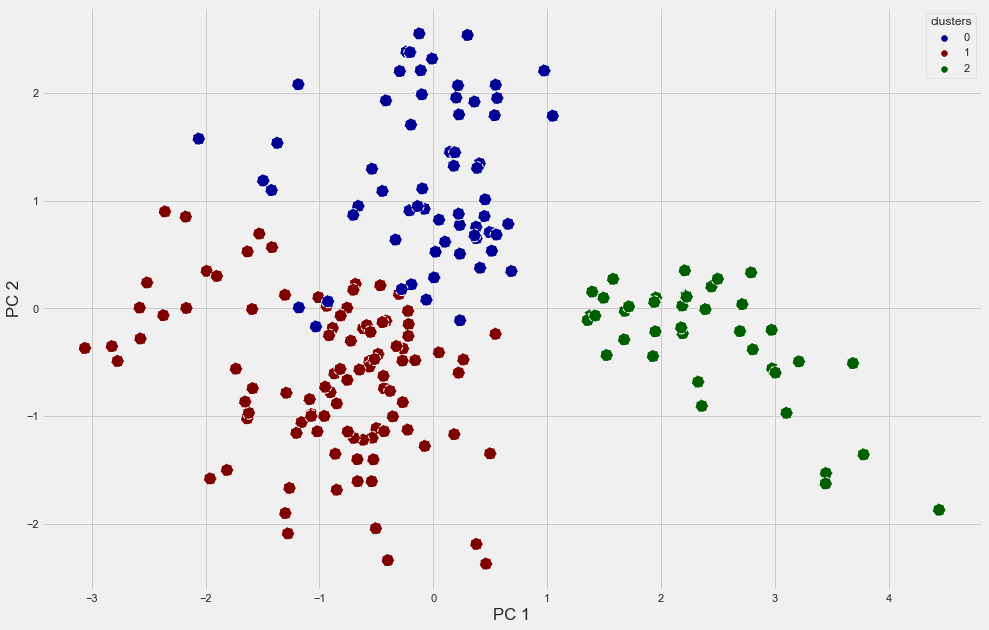

In [68]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    linestyle='--',
    data=data_pca,
    palette=['#000099','#800000','#005f00'],
    s=160,
    ax=ax)

plt.show()

In [69]:
display(data.groupby('clusters').mean())

,Age,Annual Spending (k$),Spending Score (1-100),Transaction
clusters,,,,
0,25.142857,43.269841,56.507937,2212.873016
1,50.112245,61.336735,33.438776,1969.316327
2,32.692308,86.538462,82.128205,7101.410256
